<a href="https://colab.research.google.com/github/MunazaAshraf/DIP-/blob/main/KNN_ASSIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [2]:
dataset = pd.read_csv('/content/iphone_purchase_records.csv')

In [5]:
dataset = dataset.drop('Gender', axis=1)

In [6]:
dataset.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
dataset.shape

(400, 3)

In [8]:
X =dataset.drop('Purchase Iphone',axis=1)
Y = dataset['Purchase Iphone']

In [9]:
print(X)
print(Y)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


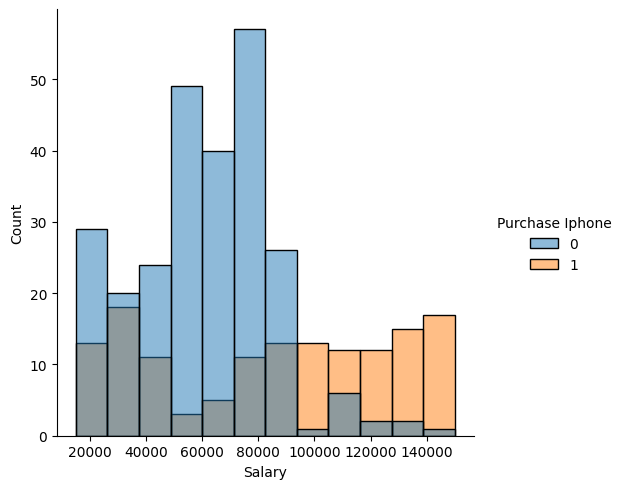

In [10]:
sns.displot(dataset, x='Salary',hue='Purchase Iphone')

Euclidean Distance

In [11]:
def euclidean_distance(pt1, pt2):
  distance = np.sqrt(np.sum(pt1-pt2)**2)
  return distance

a = np.array([3,4])
b= np.array([5,9])
print(euclidean_distance(a,b))

7.0


In [12]:
def KNN(X_train, X_test, Y_train, Y_test,k_val):
  y_hat = []
  for test_pt in X_test.to_numpy():
    distances = []
    for i in range(len(X_train)):
      distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))

    distance_data = pd.DataFrame(data = distances, columns=['distance'],index=Y_train.index)
    
    k_neighbors_list = distance_data.sort_values(by=['distance'],axis=0)[:k_val]
    
    labels = Y_train.loc[k_neighbors_list.index]

    voting = mode(labels).mode[0]

    y_hat.append(voting)
  return y_hat

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.3,random_state=42)
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val = 5)

<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: Futu

<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: Futu

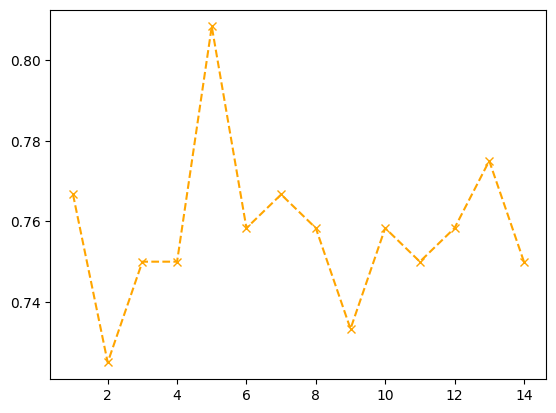

In [15]:
accuracy_vals = []
for i in range(1,15):
  y_hat_test = KNN(X_train,X_test, Y_train, Y_test ,k_val=i)
  accuracy_vals.append(accuracy_score(Y_test, y_hat_test))
plt.plot(range(1,15),accuracy_vals,color='Orange', marker='x',linestyle='dashed')

<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-12-0f434489cd8c>:14: Futu

0.8083333333333333


Text(0.5, 1.0, 'KNN Results')

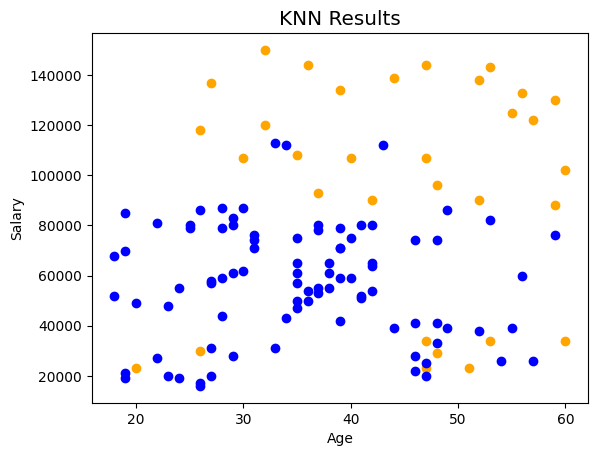

In [16]:
y_hat_test = KNN(X_train,X_test,Y_train,Y_test,k_val=5)
print(accuracy_score(Y_test,y_hat_test))

for i in range(len(y_hat_test)):
  if(y_hat_test[i]==0):
    plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='blue')
  if(y_hat_test[i]==1):
    plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='orange')
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Results')

In [17]:
acc=accuracy_score(Y_test,y_hat_test)
print(acc*100)

80.83333333333333


<Axes: xlabel='Age', ylabel='Salary'>

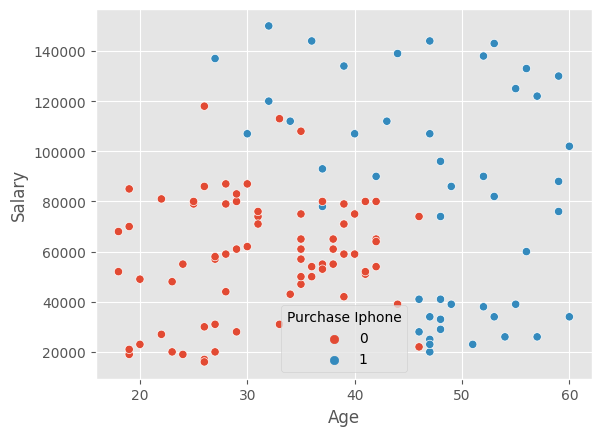

In [18]:
sns.scatterplot(data=dataset,x=X_test['Age'],y=X_test['Salary'],hue='Purchase Iphone')